# Code Transfer Test

The code transfer test is designed to test your coding skills that is learnt during the lecture training. The allotted time for the subsequent problem set is approximately 30 minutes. You are allowed to refer to Jupyter notebook throughout the test. Good luck!

Jupyter notebook resource: 

Timer extension! Heeryung

In [1]:
# First, let's import the pandas and numpy libraries
import pandas as pd
import numpy as np

# In addition, I want to show some plots, so we'll import matplotlib as well
import matplotlib.pyplot as plt

# Finally, we'll bring in the scipy stats libraries
from scipy import stats

In [2]:
# Hide
import pandas.util.testing as pdt
# %install_ext https://raw.githubusercontent.com/minrk/ipython_extensions/master/extensions/writeandexecute.py
# pdt.assert_series_equal(s1, s2)
# pdt.assert_frame_equal(f1, f2)
# pdt.assert_index_equal(i1, i2)

# Transfer Test Question
What's the probability that a NFL player makes a field goal? In this problem we are interested in predicting the probability of NFL players to make a field goal. After assuming that the probability of NFL players to make a field goal follows a beta distribution, we observe the field goals data during multiple NFL matches in 2019. 

Let us describe the model specification. The prior distribution of the probability p follows beta distribution, with shape parameters alpha and beta. The likelihood, however, follows binomial distribution since we know explicitly about the number of successful and unsuccessful field goals.

$$ Y \sim Bin(n, p)$$
$$ p \sim Beta(\alpha, \beta)$$

where $\alpha$ and $\beta$ are the hyperparameters of p.

## Question 1: Import Data
Let us compile the read_csv function to read the NFL data file into a pandas DataFrame. Then, look at the first 5 lines. The file name of the CSV file is nfl.csv.

In [3]:
# Answer
file = 'nfl.csv'


def read_csv(file):
    """Read the nfl.csv data and return the first few lines of 
    the csv file.

    """
    ### BEGIN SOLUTION
    data = pd.read_csv(file)
    # And let's look at the first few lines
    return data.head()

    ### END SOLUTION
read_csv(file)

,Player,Team,PAT,FG,0-19,20-29,30-39,40-49,50+,Lg,Pts
0,Harrison Butker,KC,0.938,0.895,0/0,9/9,9/10,13/13,3/6,56,147
1,Wil Lutz,NO,0.980,0.889,1/1,9/9,6/6,13/15,3/5,58,144
2,Justin Tucker,BAL,0.966,0.966,0/0,8/8,9/9,10/11,1/1,51,141
3,Zane Gonzalez,ARI,0.971,0.886,0/0,12/12,12/13,5/8,2/2,54,127
4,Matt Gay,TB,0.896,0.771,0/0,6/6,5/7,11/14,5/8,58,124


In [4]:
# Basic Test Case
"""Check that read_csv function returns the correct dataframe output and format."""
df1 = read_csv(file)
df2 = pd.read_csv(file).head()
pdt.assert_frame_equal(df1, df2)
# Data Type Test Case
assert isinstance(read_csv(file), pd.core.frame.DataFrame)

# Advanced Test Case

## Question 2: Column Mean
Let us define the column_mean function which takes the csv file and the column name as inputs, and returns the mean probability of making field goals. (Look at the FG column)

In [5]:
# Sample Answer
column = 'FG'


def column_mean(file, column):
    """Take the nfl.csv file and a specific column as input.
    Compute the mean value for a column in pandas dataframe.

    """
    ### BEGIN SOLUTION
    data = pd.read_csv(file)
    return data[column].mean()

    ### END SOLUTION
column_mean(file, column)

0.8363200000000002

In [6]:
# Basic Test Case
"""Test whether the data type and value of column mean are correctly returned."""
assert column_mean(file, column) == pd.read_csv(file)[column].mean()
assert 0.836319 <= column_mean(file, column) <= 0.836321
# Advanced Test Cases
assert isinstance(column_mean(file, column), (np.float64, float))

## Question 3: Specify Prior and Likelihood

Let us specify the prior and likelihood. We are going to split two code chunks to perform the following steps:

In the first code chunk, we initialize a random number generator as 123 to make the random numbers predictable. Then, we assign the hyperparameters of prior. In this question we use beta distribution as the prior. Beta distribution has two shape parameters, which is alpha and beta. We set the parameter names as alpha and beta, and assign values 40 and 20, respectively. Finally, we set the sample size as 100, using the parameter name size.

In the second code chunk, we set up a variable observed, which is the observed outcome variable. We define a function called likelihood which takes a csv file, a column in the dataset and the sample size as inputs, and return the observed outcome variable, which the product of size and the mean field goal probability. (You can take the result from question 2).

In [7]:
# Sample answer

### BEGIN SOLUTION
# We initialize random number generator seed for reproducible results
np.random.seed(123)

# We assign the hyperparameters of prior
# We assign the shape parameters alpha and beta as 40 and 20.  
alpha, beta = 40, 20

# Then we make up the sample size as 100
size = 100
### END SOLUTION

In [8]:
# Basic Test Case
from nose.tools import assert_equal
assert_equal(alpha, 40)
assert_equal(beta, 20)
assert_equal(size, 100)

In [9]:
# Finally, we set up Y the observed outcome variable as the product of size and mean field goal probability

def likelihood(file, column, size):
    """Compute the product of the column mean of field goal probability among NFL players and 
    sample size.
    """
    ### BEGIN SOLUTION
    observed = column_mean(file, column) * size
    return observed
    ### END SOLUTION
observed = likelihood(file, column, size)

In [10]:
# Basic Test Case
assert_equal(likelihood(file, column, size), column_mean(file, column) * size)
# Advanced Test Case
assert 83 <= likelihood(file, column, size) <= 84
assert isinstance(likelihood(file, column, size), (np.float64, float))

## Optional Question

You can run the following code to generate a plot for the beta distribution based on the alpha and beta parameters you defined above. Here the scipy.stats.beta function and matplotlib package are used to generate the probability density function plot.

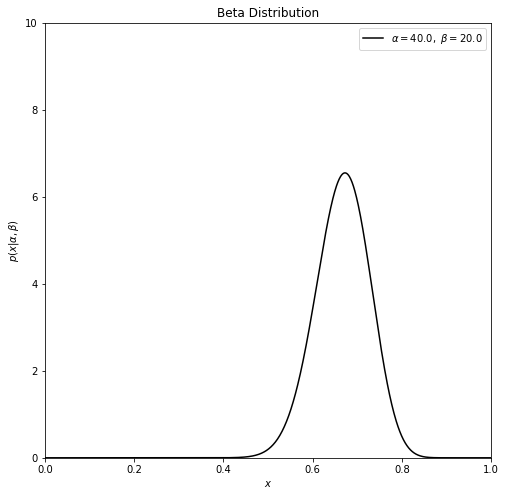

In [11]:
# We define the linestyle and set up a linear space to clearly plot the beta distribution
x = np.linspace(0,1,1002)[1:-1]

# Then, we use scipy.stats.beta function to set up beta distribution
dist = stats.beta(alpha, beta)

# Now we want to define a plot_beta_pdf function to generate a figure 
# showing the probability density function of the beta distribution
def plot_beta_pdf(x,dist):
    # Note that we want the figure to be 8 inches height and 8 inches width
    plt.figure(figsize=(8,8))
    
    # We read the linear space and the beta pdf into the plot, and we want to generate a 
    # continuous and black curve. We also want to show a legend at the top-right corner with 
    # the alpha and beta value
    plt.plot(x, dist.pdf(x), ls = '-', c = 'black',
    label = r'$\alpha = %.1f,\ \beta=%.1f$' % (alpha, beta))
    plt.legend(loc = 0)
    
    # Finally, we set up the value ranges and labels for x-axis and y-axis and show the plot
    plt.xlim(0,1)
    plt.ylim(0,10)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\alpha, \beta)$')
    plt.title('Beta Distribution')
    plt.show()
  
plot_beta_pdf(x,dist)

You will see that the beta distribution curve surprisingly resembles the case when we conduct binomial trials with roughly 40 successes and 20 failures.

In fact, we can think of $\alpha - 1$ as the number of successes and $\beta - 1$ as the number of failures. You can choose the $\alpha$ and $\beta$ parameters however you think they should look like. If you want the probability of success to become very high, let us say 95 percent, set 95 for $\alpha$ and 5 for $\beta$. If you think otherwise, let us say 5 percent, set 95 for $\beta$ and 5 for $\alpha$.

In [12]:
import pymc3 as pm

/Users/son520804/anaconda3/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/son520804/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
# Hide
import unittest

## Question 4: Train MCMC sampler

Let us train the Markov Chain Monte Carlo sampler. In this example, we use the default NUTS algorithm to sample the posterior distribution. We need to perform the following steps:

First we set a variable called niter, the number of draw, to 1000.

Second, we instantiate the model object.

Third, we specify the beta distribution as the prior for the probability of making a field goal, using the variable name p. Please remember to use the alpha and beta value specified from question 3. Note that the function for assigning beta distribution is pm.Beta().

We also specify the observed likelihood as binomial distribution, using the variable name y. The parameters taken are sample size (n), probability (p) and observed data (observed). Note that the function for binomial distribution is pm.Binomial().

Finally, we start the sampler to take 1000 draws (from niter variable) and take 3 chains. We also provide a seed to the random_seed generator to make the results reproducible. The results should be returned as a trace object.

In [14]:
# Sample answer
seed = 1000
def sampler(alpha, beta, size, observed, seed):
    """Train a MCMC sampler to generate posterior samples for the 
    field goal probability.
    
    """
    ### BEGIN SOLUTION
    niter = 1000
    model = pm.Model()

    with model:
        p = pm.Beta('p', alpha=alpha, beta=beta)

        # Specify the likelihood function (sampling distribution)
        y = pm.Binomial('y', n=size, p=p, observed=observed)
        trace = pm.sample(niter, chains = 3, random_seed = seed)
    return trace
    ### END SOLUTION
trace = sampler(alpha, beta, size, observed, seed)
trace

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [p]
Sampling 3 chains, 0 divergences: 100%|██████████| 4500/4500 [00:17<00:00, 263.22draws/s]
The acceptance probability does not match the target. It is 0.8934043875917739, but should be close to 0.8. Try to increase the number of tuning steps.


<MultiTrace: 3 chains, 1000 iterations, 2 variables>

In [15]:
# Test Cases
"""Check the correctness of parameters assigned to the PyMC3 model."""
#assert_equal(seed, 1000)
assert isinstance(trace, (pm.backends.base.MultiTrace))
assert_equal(trace.varnames, ['p_logodds__', 'p'])
assert_equal(len(trace['p']), 3000)
#
#

## Posterior Diagnostics

## Question 5

Now we look at the posterior diagnostics. Recall we will plot a traceplot to visualize the posterior distribution of parameters of interest. In addition, we also obtain Gelman-Rubin statistics to check whether the parameter of interest converges.

a) Define a function named traceplot which takes the trace object as input and returns a traceplot for the variable p, the probability of making a field goal. 

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


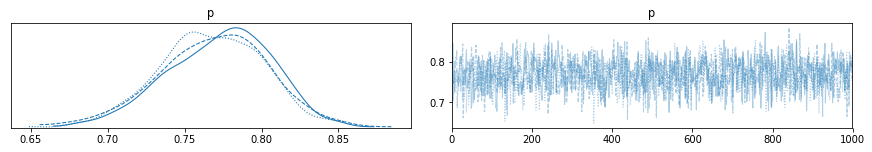

In [16]:
# Answer 5a
# Plot results Traceplot
def traceplot(trace):
    """Generate the posterior density plot and trajectory plot for the field goal probability."""
    
    # BEGIN SOLUTION
    return pm.traceplot(trace, varnames = ['p'])
    # END SOLUTION
traceplot(trace)
plt.show()

In [17]:
# Test cases
"""Check the length data type and shape of the traceplot object for sanity purpose.
To make sure the number of plots generated are correct."""
assert_equal(len(traceplot(trace)), 1)
assert isinstance(traceplot(trace), np.ndarray)
assert_equal(traceplot(trace).shape, (1,2))

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


b) (Optional) What trends do you see in the posterior distribution of the probability of making a field goal?

c) Define a function named posterior_summary which takes a trace object as input and displays a table-based summary of posterior statistics rounded by 2 digits. 

In [19]:
# Answer 5c
# Obtain summary statistics for posterior distributions
def posterior_summary(trace):
    """Generate a table-based summary for the field goal probability."""
    # BEGIN SOLUTION
    return pm.summary(trace).round(2)
    # END SOLUTION

In [20]:
# Test Cases
"""Check whether the summary output is correctly generated."""
sum1 = posterior_summary(trace)
sum2 = pm.summary(trace).round(2)
pdt.assert_frame_equal(sum1, sum2)
assert_equal(posterior_summary(trace).shape, (1, 11))

d) What is the posterior mean and standard deviation of the probability of making a field goal? Define a function posterior_statistics which takes a trace object as input and return the posterior mean and posterior standard deviation as a tuple looks like (mean, sd).

In [21]:
# Answer 5d

def posterior_statistics(trace):
    return (posterior_summary(trace).iloc[0,0], posterior_summary(trace).iloc[0,1])
posterior_statistics(trace)

(0.77, 0.03)

In [23]:
# Test Cases
"""Check whether the posterior mean and posterior standard deviation are correctly generated."""
assert_equal(posterior_statistics(trace), 
             tuple([posterior_summary(trace).iloc[0,0], posterior_summary(trace).iloc[0,1]]))
assert isinstance(posterior_statistics(trace), tuple)
assert_equal(len(posterior_statistics(trace)), 2)


e) Define a function named gelman_rubin which takes a trace object as input and return the Gelman-Rubin statistics. Does the posterior distribution converge?

In [30]:
# Answer
# Get Gelman-Rubin Convergence Criterion
def gelman_rubin(trace):
    """Compute Gelman-Rubin statistics for the posterior samples of field goal probability."""
    ### BEGIN SOLUTION
    return print(pm.gelman_rubin(trace,
                     varnames=['p']))
    ### END SOLUTION
gelman_rubin(trace)

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 1.004


In [31]:
# Test cases
assert_equal(gelman_rubin(trace), pm.gelman_rubin(trace,varnames=['p']))
#assert 1 <= gelman_rubin(trace) <= 1.1

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 1.004


/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 1.004


TypeError: '<=' not supported between instances of 'int' and 'NoneType'

In [35]:
gelman_rubin(trace)[p]

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 1.004


NameError: name 'p' is not defined

## Bonus Section:

### Effective sample size

The calculation of effective sample size is given by the following formula:
$$\hat{n}_{eff} = \frac{mn}{1 + 2 \sum_{t=1}^T \hat{\rho}_t}$$
where m is the number of chains, n the number of steps per chain, T the time when the autocorrelation first becomes negative, and ρ̂_t the autocorrelation at lag t.



In [101]:
## Calculate effective sample size
pm.effective_n(trace)

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:50: UserWarning: effective_n has been deprecated. In the future, use ess instead.
  warnings.warn("effective_n has been deprecated. In the future, use ess instead.")


<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 1.271e+03

As you can see, the effective sample size is 1271 for the total of the 3 chains. Since by default, the tuning sample is 500, leaving 500 samples to be resampled. So that means the autocorrelation is not extreme, the MCMC converges well.

### Geweke Statistics

As an alternative of Gelman-Rubin statistics, Geweke provides a sanity check of the convergence of MCMC chains. Geweke statistics compares the mean and variance of segments from the beginning and end of each single MCMC chain for a parameter. If the absolute value of Geweke statistics exceeds 1, it indicates a lack of convergence and suggests that additional samples are requred to achieve convergence.

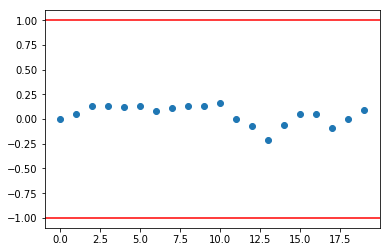

In [36]:
# We can create a plot to show the trajectory of Geweke statistics 
plt.plot(pm.geweke(trace['p'])[:,1], 'o')
plt.axhline(1, c='red')
plt.axhline(-1, c='red')
plt.gca().margins(0.05)
plt.show()
pass

Since the Geweke statistics are less than 1 in absolute value, it indicates a good convergence in the MCMC chains.

# Debug Question

The following question requires you to read the code carefully and correct the codes with errors. A Umich cognitive science research team want to produce an elegant code to run a MCMC sampler to determine the IQ distribution of the undergraduate students studying at the University of Michigan. They studied the literature and inferred the following priors:

$IQ \sim Normal(mean = 105, variance = 7^2)$

$\sigma(IQ) \sim HalfNormal(\beta = 2)$

Then they collected experimental data from 100 students who took the Wechsler Adult Intelligence Scale (WAIS) test at the cognitive science building. The first code chunk gives their test results.

After debugging the code, the resulting code should be error-free and return the trace object.

In [36]:
# IQ test results for the 100 students
np.random.seed(123)
y = np.random.normal(100, 15, 100)

In [37]:
# Hierarchical Bayesian Modeling

seed = 123
niter = 1000
nchains = 3
with pm.Model() as model:
    """Deploy NUTS sampler to update the distribution for students' IQ."""
    
    ### BEGIN CODE
    mu = pm.Normal('mu', mu = 105, sigma = 7)
    sigma = pm.HalfCauchy('sigma', beta = 2)
    y_observed = pm.Normal('y_observed',
                mu=mu,
                sigma=sigma,
                observed=y)
    
    trace2 = pm.sample(niter, chains = nchains, random_seed = seed)
    ### END CODE

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 3 chains, 0 divergences: 100%|██████████| 4500/4500 [02:46<00:00, 27.04draws/s]


In [39]:
# Test cases
assert_equal(type(posterior_summary(trace2)), pd.core.frame.DataFrame)
assert_equal(posterior_summary(trace2).shape, (2,11))

(2, 11)

Reference:
    1. https://docs.pymc.io/api/stats.html
    2. http://pymc-devs.github.io/pymc/modelchecking.html?highlight=geweke
    3. Wagenmakers, E., Morey, R. D., & Lee, M. D. (n.d.). Bayesian Benefits for the Pragmatic Researcher, 1–11.